In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_csv(r'D:\Datasets\glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

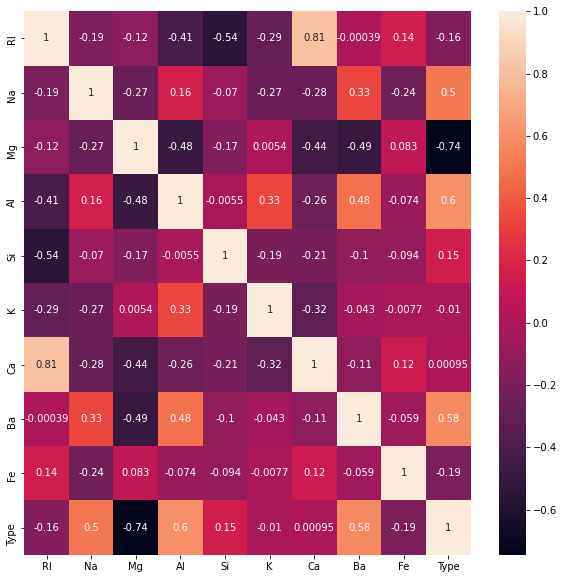

In [8]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [102]:
# splitting of features and target
x=df.drop(columns=['Ca','K','Type'])
y=df['Type']


In [25]:
#undersampling to make dataset balanced
from imblearn.over_sampling import SMOTE
x_re,y_re=SMOTE().fit_resample(x,y.values.ravel())

In [26]:
x_re=pd.DataFrame(x_re)
y_re=pd.DataFrame(y_re)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_re,y_re,test_size=0.3,random_state=5)
y_test.shape

(137, 1)

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(x_train))
X_test2 = pd.DataFrame(sc_X.transform(x_test))
X_train2.columns = x_train.columns.values
X_test2.columns = x_test.columns.values
X_train2.index = x_train.index.values
X_test2.index = x_test.index.values
x_train = X_train2
x_test = X_test2

In [46]:
#model building
# using SVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
model=SVC()
estimators=[]
estimators.append(('SVC',model))

In [47]:
model.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [48]:
y_predict=model.predict(x_test)

In [49]:
accuracy_score(y_test,y_predict)

0.8321167883211679

<AxesSubplot:>

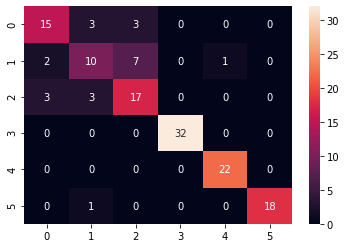

In [50]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True)

In [51]:
#model using decision tree
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

estimators.append(('decision_tree',model2))

In [52]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)


0.8321167883211679

<AxesSubplot:>

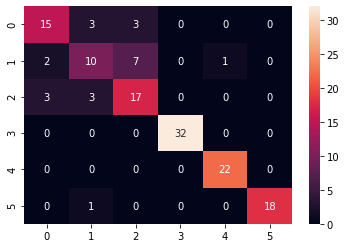

In [54]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True)


In [56]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
estimators.append(('LR',model3))

In [57]:
model3.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [58]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)


0.8321167883211679

In [63]:
#ensemble
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators)

In [68]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ensemble,X=x_train,y=y_train,cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))



C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vect

Accuracy: 0.850 (+/- 0.133)


C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The accuracy of the model is 85% using ensembling